# Sudoku solver project

In [8]:
import tkinter as tk
from PIL import Image, ImageTk

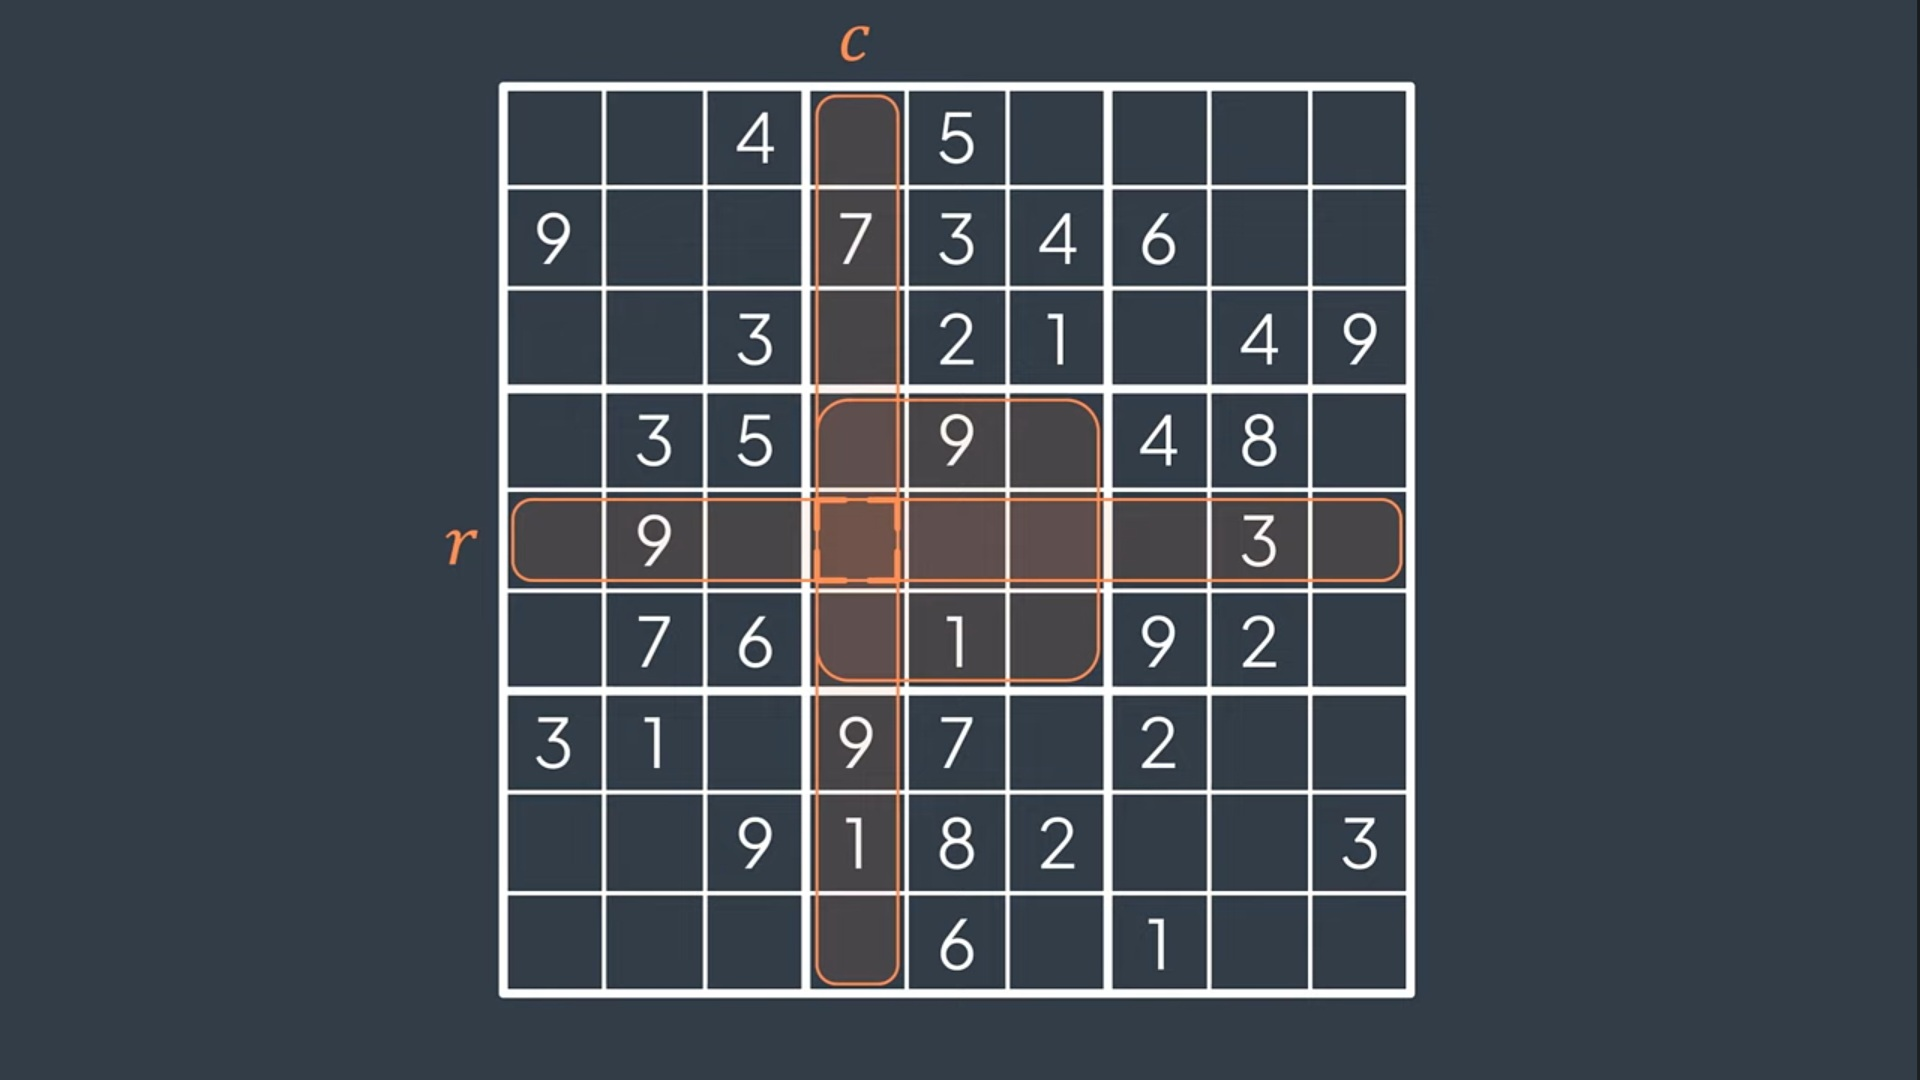

In [9]:
def solve_sudoku(entries):
    # Convert the entries to a 2D list
    sudoku_grid = [[int(entry.get() or 0) for entry in row] for row in entries]

    def is_valid(grid, r, c, k):
        not_in_row = k not in grid[r]
        not_in_column = k not in [grid[i][c] for i in range(9)]
        not_in_box = k not in [grid[i][j] for i in range(r//3*3, r//3*3+3) for j in range(c//3*3, c//3*3+3)]
        return not_in_row and not_in_column and not_in_box

    def solve(grid, r=0, c=0):
        if r == 9:
            return True
        elif c == 9:
            return solve(grid, r+1, 0)
        elif grid[r][c] != 0:
            return solve(grid, r, c+1)
        else:
            for k in range(1, 10):
                if is_valid(grid, r, c, k):
                    grid[r][c] = k
                    if solve(grid, r, c+1):
                        return True
                    grid[r][c] = 0
            return False

    if solve(sudoku_grid):
        for i in range(9):
            for j in range(9):
                entries[i][j].delete(0, tk.END)
                entries[i][j].insert(0, str(sudoku_grid[i][j]))

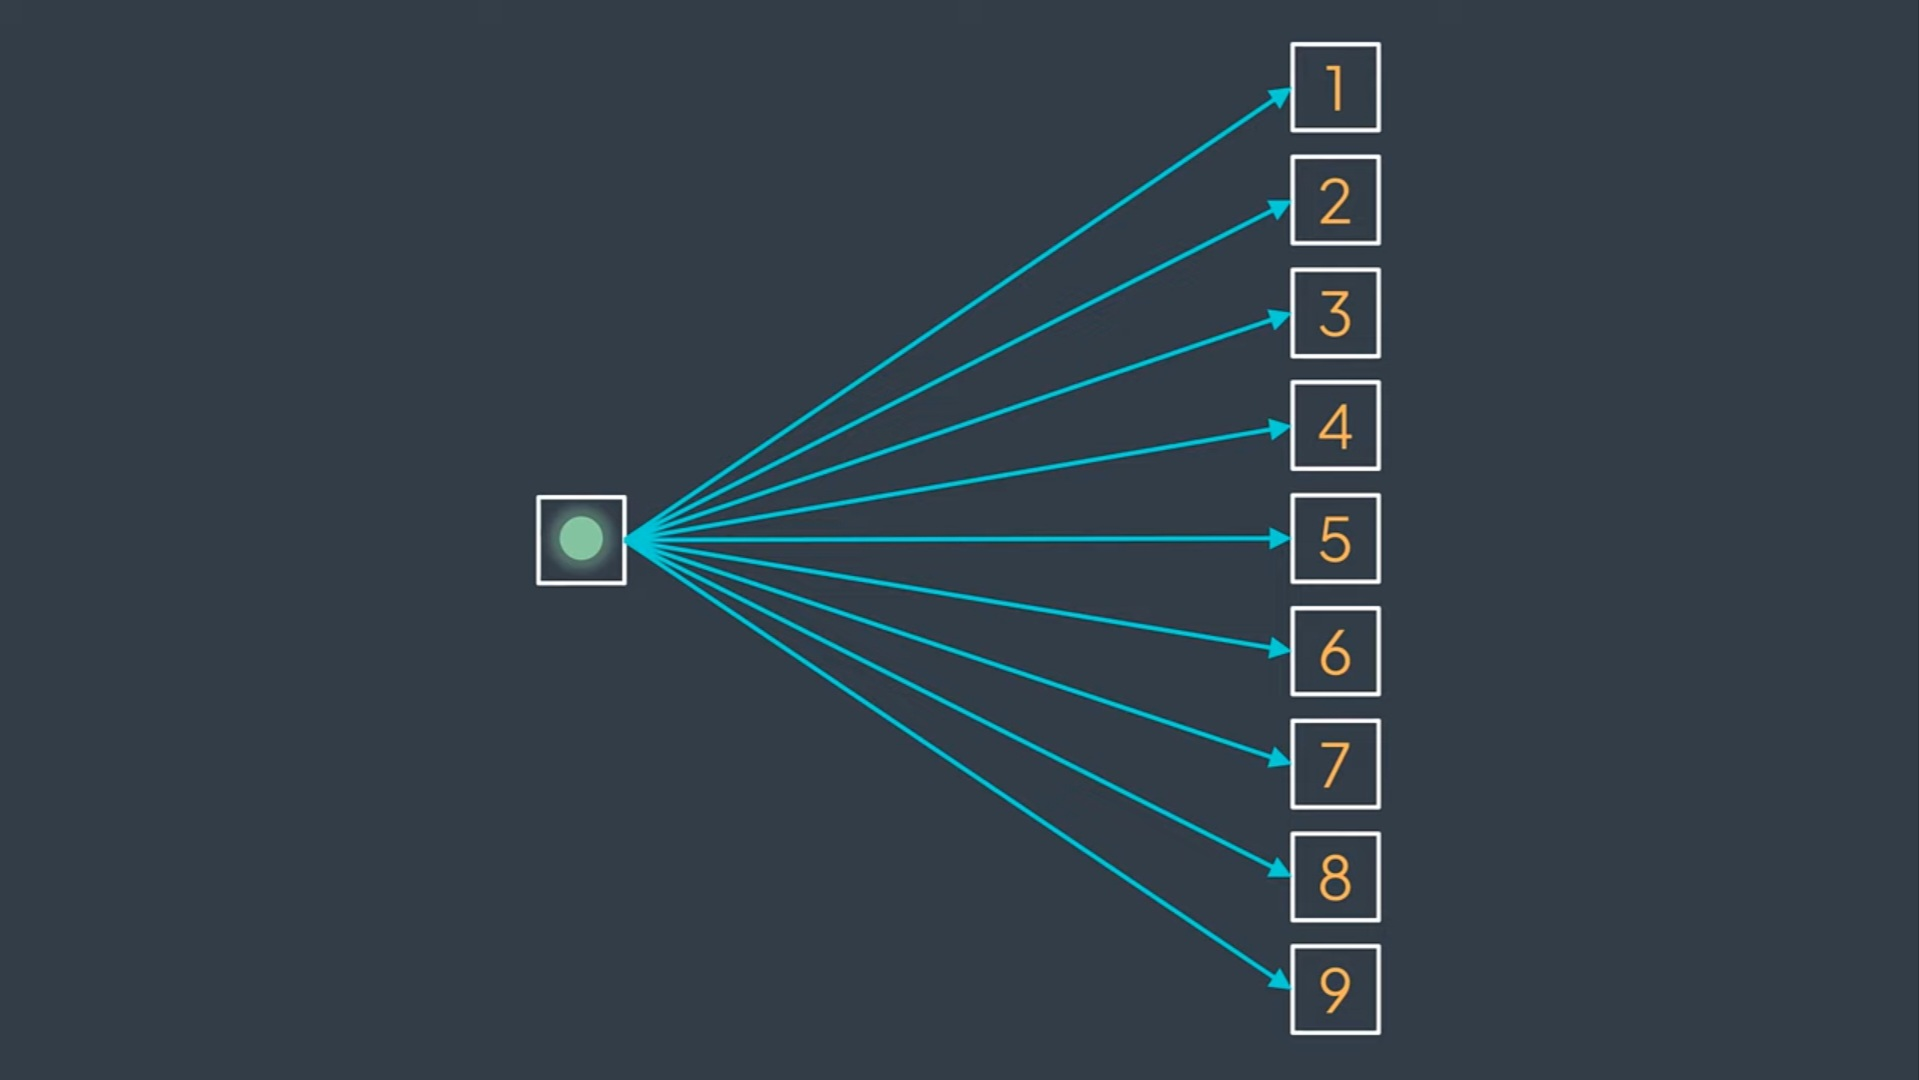

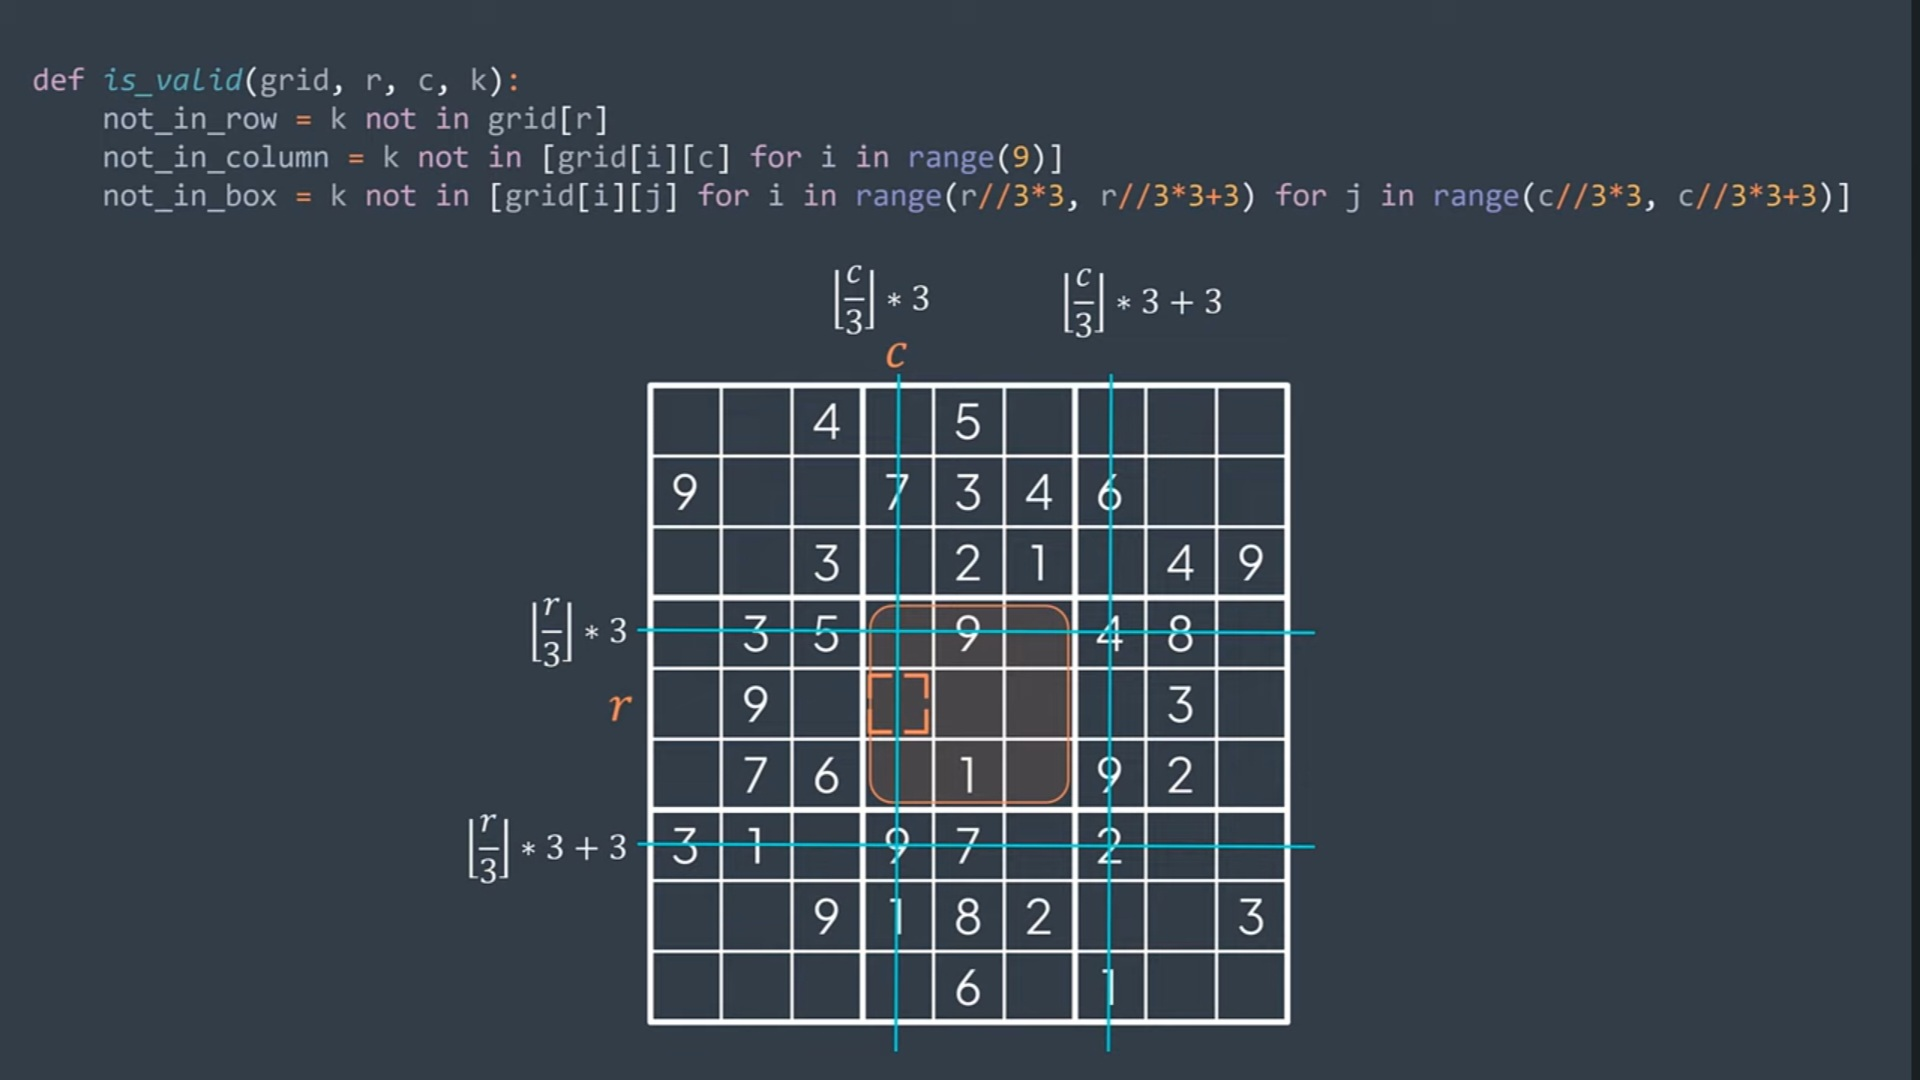

In [10]:
root = tk.Tk()
root.title("Sudoku Solver")

image = Image.open("sud.jpeg")
image = image.resize((1300, 700), Image.ANTIALIAS) 
background_image = ImageTk.PhotoImage(image)

canvas = tk.Canvas(root, width=1300, height=700)
canvas.pack()
canvas.create_image(0, 0, anchor=tk.NW, image=background_image) #northwest=nw = top-left corner 

1

In [11]:
def open_sudoku():
    start_button.destroy()
    canvas.destroy()

    sudoku_frame = tk.Frame(root)
    sudoku_frame.pack()

    entries = [[None for _ in range(9)] for _ in range(9)]
    for i in range(9):
        for j in range(9):
            entries[i][j] = tk.Entry(sudoku_frame, width=6, font=("Arial", 25), bg="#b5bdbc", bd=1, justify="center")
            entries[i][j].grid(row=i, column=j, padx=1, pady=1, ipadx=5, ipady=5) 
            if i % 3 == 2:
                entries[i][j].grid(pady=(0, 5))
            if j % 3 == 2:
                entries[i][j].grid(padx=(0, 5))

    solve_button = tk.Button(sudoku_frame, text="Solve", command=lambda: solve_sudoku(entries), bg="#4caf50", fg="white", font=("Arial", 14))
    solve_button.grid(row=9, columnspan=9, pady=(10, 20))

start_button = tk.Button(root, text="  Start  ", command=open_sudoku, bg="#0575CA", fg="white", font=("Arial", 25))
start_button.place(x=25, y=570)


In [ ]:
root.mainloop()